# Assignment 1

First we need to import a few modules, execute the cell below:

In [2]:
import numpy 
import matplotlib.pyplot as plt
%matplotlib inline

Define a function `f` that is equivalent to $f(x)=\cos(x)$. It should work both for single arguments and `numpy` arrays.

In [3]:
def f(x):
    '''Function equivalent to cos(x), should work for one argument or a numpy array'''
    return numpy.cos(x)

You can use the following cell to check that your code works for scalar arguments:

In [4]:
assert numpy.isclose(f(0.5),0.87758256189)

Make sure your code also works with a numpy array:

In [5]:
xs = numpy.arange(start=0.1, stop=0.7, step=0.1)
assert numpy.isclose(
            f(xs), 
            [0.99500417, 0.98006658, 0.95533649, 0.92106099, 0.87758256, 0.82533561]
        ).all()

Define the analytic derivative of the function`f` here (again, it should work both for single numbers and numpy arrays).

In [6]:
def df_analytic(x):
    '''
    The analytic derivative
    '''
    return -1*numpy.sin(x)

In [7]:
assert numpy.isclose(df_analytic(0.5), -0.4794255386)

In [8]:
xs = numpy.arange(start=0.1, stop=0.7, step=0.1)
assert numpy.isclose(
            df_analytic(xs),
            [-0.09983342, -0.19866933, -0.29552021, -0.38941834, -0.47942554,-0.56464247]
        ).all()

Now define the numerical derivative using the backward difference method. The function `backward_difference` takes three arguments, `f`, the function to calculate the derivative for, `x` the position to calculate the derivative at and `dx` the interval length.

In [9]:
def backward_difference(f, x, dx):
    '''
    This function implements the backward difference method for the 
    first derivative of the function f at position x using interval
    dx.
    '''
    return (f(x)-f(x-dx))/dx

In [10]:
assert numpy.isclose(
    backward_difference(f, 0.1, 0.0001),
    -0.09978366627194646
)

**Task 1:**

Here is a skeleton code to plot the difference between the analytical derivative and the numerical implementation. Modify and expand it to provide a plot with three curves for the difference for a case where $dx$ is too large, about right and too small. The plot should have a legend, labelled axes and a title.

You can get help about plotting on the Python handbook that you can find at:

https://dmaitre.phyip3.dur.ac.uk/notes/l1python/part-5/


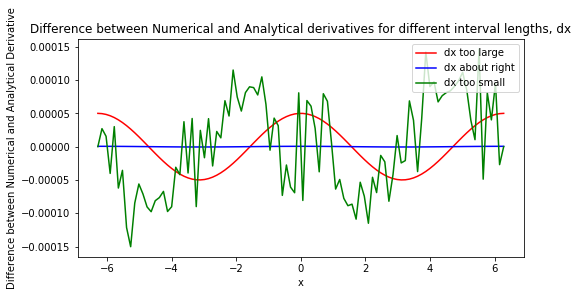

In [57]:
xs = numpy.linspace(-2*numpy.pi,2*numpy.pi,100)
df_dx_1 = backward_difference(f, xs, dx=1e-4) #too big
df_dx_2 = backward_difference(f, xs, dx=1e-6) #just right
df_dx_3 = backward_difference(f, xs, dx=1e-12) #too small
df_dx_analytical = df_analytic(xs) #analytical derivative
plt.figure(figsize=(8, 4))
plt.plot(xs, df_dx_1 - df_dx_analytical, color="red", label='dx too large')
plt.plot(xs, df_dx_2 - df_dx_analytical, color="blue", label='dx about right')
plt.plot(xs, df_dx_3 - df_dx_analytical, color="green", label='dx too small')

plt.ylabel("Difference between Numerical and Analytical Derivative")
plt.xlabel("x")

plt.title("Difference between Numerical and Analytical derivatives for different interval lengths, dx")
plt.legend(loc='upper right')

**Task 2: ** 

Describe in the text box below why the numerical method looses accuracy in the case where
$\Delta x$ is too small and the case where $\Delta x$ is too large. (Double-click on "YOUR ANSWER HERE" to edit.)


For a function $f(x)=\frac{(3+x)-3}{x}$, you would expect $f(x)=1$ for all $x$, but this is not true when $\Delta x$ is too small or too large.


When $\Delta x$ is too small, for example x=0.0123456789, then a computer will only store to a cetain precision, for example, 5 digits. This means digits are lost and $x$ will be stored as $1.23457*10^{-2}$. Evaluate $(3+x)$ for this $x$. $3+x: 3+0.0123457=3.0123457$ which gets stored at $3.01235*10^0$. Due to the numbers being stored to a certain precision, this causes information (digits) to be lost everytime $x$ is evaluated in the function. For this $x$, $f(x)= \frac{1.235\cdots*10^{-2}}{1.23457*10^{-2}}=1.00\cdots$, where the computer makes up the rest of the numbers leading to a loss in accuracy and precision.

When $\Delta x$ is too large, the same thing happens. For example x=123456789, again for a precision of 5 digits this will be $1.23457*10^8$. The final digets being rounded away again leads to a loss in accuracy.
